Here I ave tried to locate different parts in the brain and to show brain phantom in different contrasts using T1,T2 and PD weighting.

## Import modules

In [1]:
import numpy as np
import utils

## 1. Instpect the digital brain phantom (Aubert-Broche, Neuroimage 2006)
### 1.1 Load the file digital_brain_phantom.mat
- Label (mat['ph']['label'][0][0]) 
  - 1: Cerebrospinal Fluid (CSF)
  - 2: Gray Matter (GM)
  - 3: White Matter (WM)
- T1_map (mat['ph']['t1'][0][0])
  - Predefined T1 values
- T2_map (mat['ph']['t2'][0][0])
  - Predefined T2 values
- PD_map (mat['ph']['sd'][0][0])
  - Predefined proton density(PD) values

In [2]:
mat = utils.load_data("digital_brain_phantom.mat")
label = mat['ph']['label'][0][0]
T1_map = mat['ph']['t1'][0][0]
T2_map = mat['ph']['t2'][0][0]
PD_map = mat['ph']['sd'][0][0]

### 1.2 Display the regions CSF, GM, and WM

Define CSF, GM, and WM

In [3]:

CSF_seg=(label==1)
GM_seg=(label==2)
WM_seg=(label==3)

Display CSF, GM, and WM

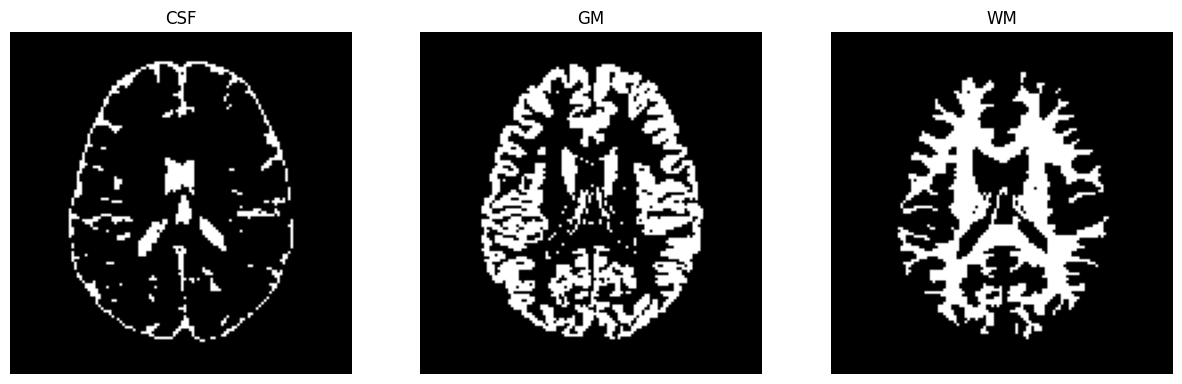

In [4]:

[i.shape for i in ([CSF_seg,GM_seg,WM_seg])]
utils.imshow([CSF_seg,GM_seg,WM_seg], titles=["CSF","GM","WM"])

### 1.3 Display the predefined T1, T2, and PD values for these three regions

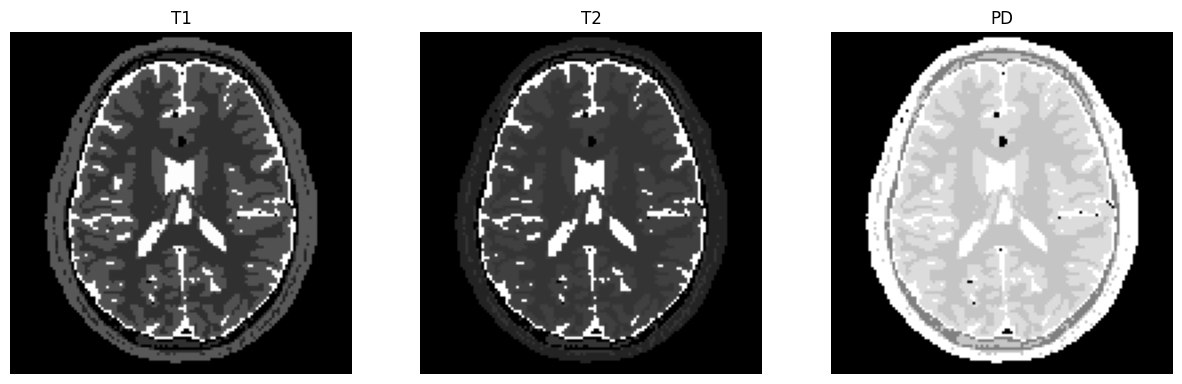

In [5]:

utils.imshow([T1_map,T2_map,PD_map], titles=["T1","T2","PD"])

Unique values of T1_map, T2_map, and PD_map

In [6]:


print(f"Unique values of T1_map: {set(T1_map.flatten())}")
print(f"Unique values of T2_map: {set(T2_map.flatten())}")
print(f"Unique values of PD_map: {set(PD_map.flatten())}")


Unique values of T1_map: {1, 833, 900, 2596, 2569, 500, 350}
Unique values of T2_map: {1, 70, 329, 47, 83}
Unique values of PD_map: {0.0, 1.0, 0.7700000000000029, 0.5, 0.7700000000000011, 0.8599999999999961, 0.7699999999999846}


CSF

In [7]:

idx_csf=np.argwhere(CSF_seg)
print(idx_csf)
T1_CSF=T1_map[idx_csf[0,0],idx_csf[0,1]]
T2_CSF=T2_map[idx_csf[0,0],idx_csf[0,1]]
PD_CSF=PD_map[idx_csf[0,0],idx_csf[0,1]]
print(f"T1 CSF={T1_CSF}ms")
print(f"T2 CSF={T2_CSF}ms")
print(f"PD CSF={PD_CSF}ms")

[[ 11  54]
 [ 11  55]
 [ 11  56]
 ...
 [114  76]
 [115  71]
 [115  72]]
T1 CSF=2569ms
T2 CSF=329ms
PD CSF=1.0ms


GM

In [5]:

T1_GM=np.mean(np.extract(GM_seg,T1_map))
T2_GM=np.mean(np.extract(GM_seg,T2_map))
pd_GM=np.mean(np.extract(GM_seg,PD_map))
print(f"T1 GM={T1_GM}ms")
print(f"T2 GM={T2_GM}ms")
print(f"PD GM={pd_GM}ms")

T1 GM=833.0ms
T2 GM=83.0ms
PD GM=0.8599999999999961ms


WM (In this case, we get all values of segment and average them The results are the same as we've done above)

In [6]:

#repeat above steps only
idx_GM=np.argwhere(GM_seg)
print(idx_GM)
T1_WM=np.mean(np.extract(WM_seg,T1_map))
T2_WM=np.mean(np.extract(WM_seg,T2_map))
pd_WM=np.mean(np.extract(WM_seg,PD_map))
print(f"T1 WM={T1_WM}ms")
print(f"T2 WM={T2_WM}ms")
print(f"PD WM={pd_WM}ms")

[[ 12  56]
 [ 12  57]
 [ 12  58]
 ...
 [114  71]
 [114  72]
 [114  74]]
T1 WM=500.0ms
T2 WM=70.0ms
PD WM=0.7699999999999846ms


## Simulate MR Image Contrast from Pulse Sequences

### 2. Spin Echo Proton Density Weighted (PDw):

#### 2.1.1 Excitation and Refocusing Pulses
- Assume a 90º excitation pulse.
- Assume a 180º refocusing pulse.

#### 2.1.2 Signal Equation
- Use the Spin-Echo signal equation from Bernstein equation 14.57.

In [10]:

spin_echo=lambda TR,TE:PD_map*(1-2*np.exp((-(TR-TE/2)/T1_map))+np.exp((-TR/T1_map)))*np.exp(-TE/T2_map)

#### 2.1.3 Selection of TR and TE
- Choose the Repetition Time (TR) and Echo Time (TE) accordingly.
- Consider the T1 and T2 values of Gray Matter (GM) and White Matter (WM) when determining TR and TE.


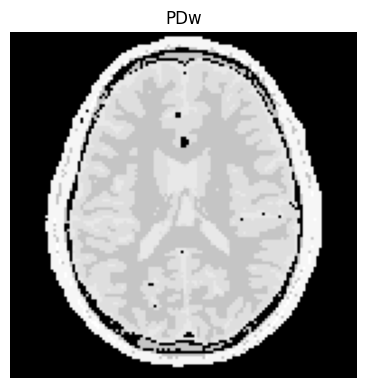

In [17]:

TE=5
TR=5000
PDw=spin_echo(TR,TE)
utils.imshow([PDw],titles=['PDw'])

#### 2.1.4 Spin Echo T1 Weighted:
- Use the same signal equation as for PDw.
- Adjust TR and TE accordingly for T1 weighting.

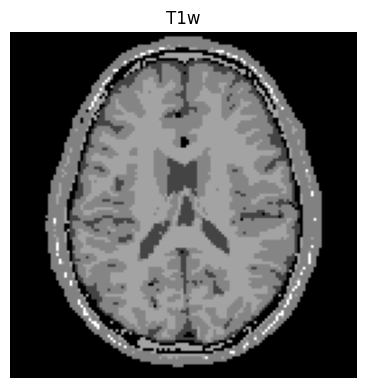

In [18]:

TE=14
TR=500
T1w=spin_echo(TR,TE)
utils.imshow([T1w],titles=['T1w'])

#### 2.1.5 Spin Echo T2 Weighted:
- Use the same signal equation as for PDw.
- Adjust TR and TE accordingly for T2 weighting.


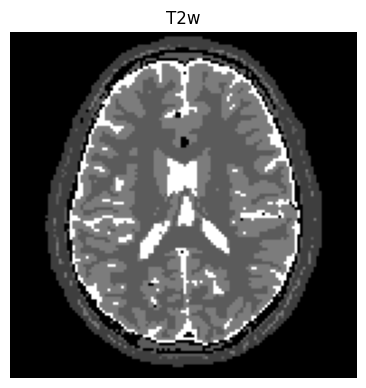

In [19]:

TE=90
TR=4000
T2w=spin_echo(TR,TE)
utils.imshow([T2w],titles=['T2w'])

#### Plot PDw, T1w, and T2w images


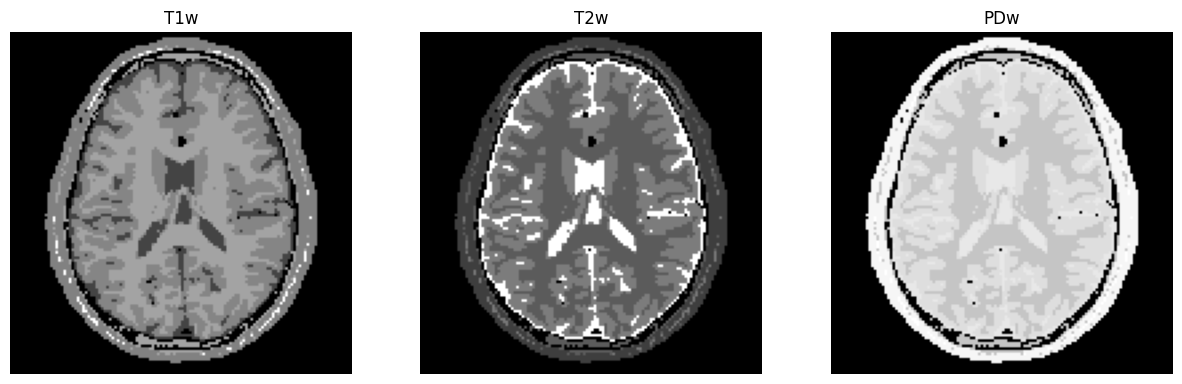

In [20]:

utils.imshow([T1w,T2w,PDw], titles=["T1w","T2w","PDw"])